### import requisite libraries

In [49]:
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import json

### build modelling data
* load feature transformed data
* configure multiclass classification targets
* split into train and test set

In [70]:
df = pd.read_csv('../data/transformed_data.csv').drop(columns=['info'])

In [71]:
with open('target_mappings.json','r') as f:
    target_mapper = json.load(f)

In [72]:
if df['target'].dtype == 'O':
    df['target'] = df['target'].apply(target_mapper.get)

In [78]:
df = df.loc[df['nonzero_p']>0.00001]

In [88]:
df['target'].value_counts()

6     2022
4     2022
16    2022
17    2022
7     2022
5     2022
11    1554
10    1554
2     1307
3     1307
1      507
0      507
8      502
9      502
12     464
13     464
14       1
15       1
Name: target, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size=0.3)

In [81]:
#One vs All implementation
# ohe = OneHotEncoder()
# ohe.fit(df[['target']])
# targets = ohe.get_feature_names_out()
# df[targets] = ohe.transform(df[['target']]).toarray()
# df = df.drop(columns=['target'])
# X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=targets), df[targets], test_size=0.3)

### train model

In [82]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
y_pred = clf.predict(X_test)

### build results

In [84]:
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       162
           1       0.97      0.96      0.96       142
           2       0.98      0.98      0.98       394
           3       0.97      0.97      0.97       394
           4       1.00      1.00      1.00       622
           5       1.00      1.00      1.00       617
           6       1.00      1.00      1.00       615
           7       1.00      1.00      1.00       607
           8       0.99      0.97      0.98       158
           9       0.93      0.97      0.95       142
          10       0.99      0.99      0.99       467
          11       0.97      0.98      0.98       428
          12       0.97      0.99      0.98       143
          13       0.99      0.93      0.96       143
          16       1.00      1.00      1.00       595
          17       1.00      1.00      1.00       612

    accuracy                           0.99      6241
   macro avg       0.98   

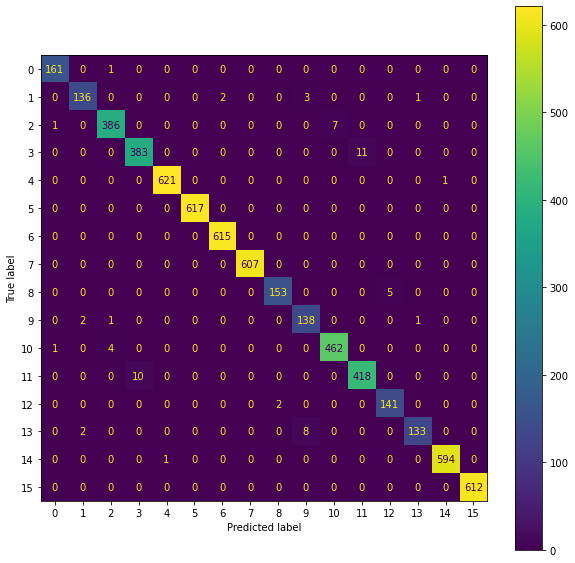

In [85]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test, ax=ax)
plt.show()

<BarContainer object of 5 artists>

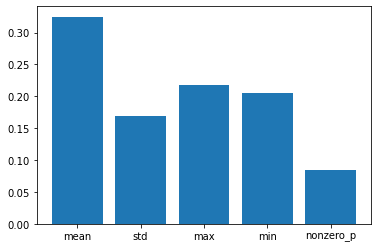

In [86]:
plt.bar(X_test.columns, clf.feature_importances_)

### plot the basic results